# Exploring Business Analysis

## Problem Statement:
**Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’ and find out trends and meaningful conclusions from it.**

### Author- Yashowardhan Shinde

## **There are two parts to this Assignment:**

1. **Regional Analysis**
    - **Central**
    - **South**
    - **East**
    - **West**
             
             
2. **Product Analysis**
    - **Furniture**
    - **Office Supplies**
    - **Technology**

### Importing all the necessary packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os
import matplotlib.image as image
%matplotlib inline

In [2]:
from IPython.core.display import HTML
HTML('''
<style>
.output_png{
display:table-cell;
text-align:center;
vertical-align:middle;
}
</style>'''
)

### Loading the Dataset:

**Loading the given dataset, formatting the data and visulaizing the data to find some relation in the data plotting a heatmap and a pairplot for analysis.** 

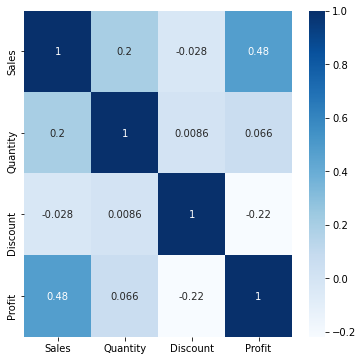

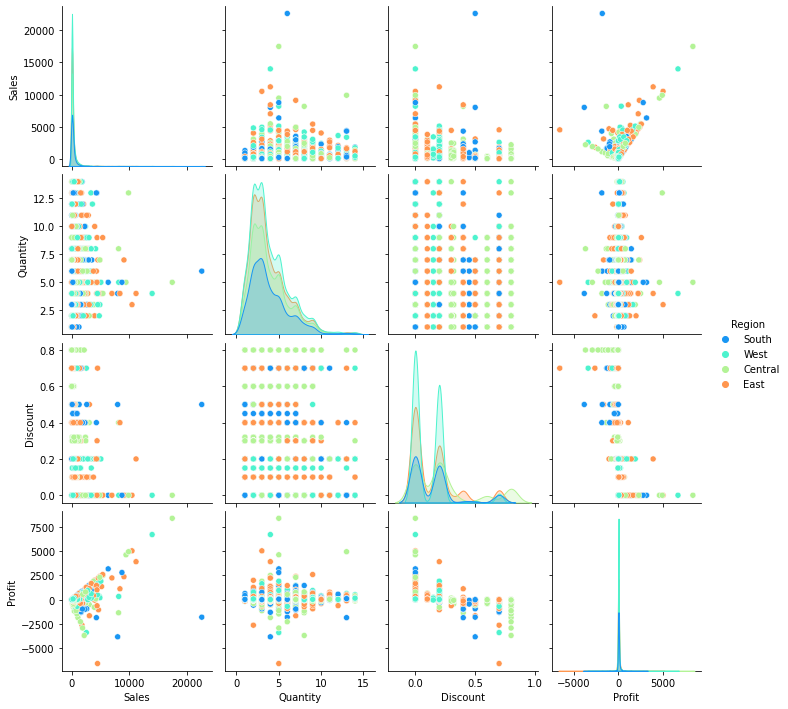

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
# df.head()
df.drop(columns = ['Country', 'Postal Code', 'City', 'Ship Mode'], axis = 1, inplace = True)

fig = plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.show()
sns.pairplot(df, hue = 'Region', palette='rainbow')
plt.show()

### **Using the insights from the graphs above and trying to find some trends in the data**

In [4]:
df = pd.read_csv('SampleSuperstore.csv')
# df.head()

In [5]:
country = set(list(df["Country"]))
# country
city = set(list(df['City']))
# city
category = set(list(df['Category']))
# category

In [6]:
df_1 = df.groupby(by = ['Region'])
df_1.first()

,Ship Mode,Segment,Country,City,State,Postal Code,Category,Sub-Category,Sales,Quantity,Discount,Profit
Region,,,,,,,,,,,,
Central,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Office Supplies,Appliances,68.810,5,0.8,-123.8580
East,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,Furniture,Chairs,71.372,2,0.3,-1.0196
South,Second Class,Consumer,United States,Henderson,Kentucky,42420,Furniture,Bookcases,261.960,2,0.0,41.9136
West,Second Class,Corporate,United States,Los Angeles,California,90036,Office Supplies,Labels,14.620,2,0.0,6.8714


### Plotting a Choropleth Map to get an overview of the data of Sales and Profits all over The United States:

In [7]:
S = df.groupby(by =['State'])
state_geo = os.path.join('/Users/hp/Desktop/jupyter notebooks/The sparks foundation', 'us-states.json')

states = list(set(df['State']))
states = sorted(states)
data = []
for i in range(len(states)):
    s = S.get_group(states[i])
    val = sum(s['Profit'])
    data.append(val)
    
data.insert(1, 0)
states.insert(1, 'Alaska')
data.pop(8)
states.pop(8)
data.insert(10, 0)
states.insert(10,'Hawai')

data, states
state_data = pd.DataFrame({'State':states, 'Profit':data})
bogus = pd.read_excel('states.xlsx')
st = list(bogus['State'])
state_data['State'] = st

# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'Profit'],
 key_on='feature.id',
 fill_color='YlOrRd',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Profit/Loss in Dollars'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#292_folium_chloropleth_USA1.html')
from IPython.display import IFrame

IFrame(src='http://localhost:8888/view/Desktop/Jupyter%20Notebooks/The%20Sparks%20Foundation/%23292_folium_chloropleth_USA1.html'
       , width=700, height=400)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#### We can clearly see from the above Choropleth map that sales all over USA are average but there are some regions where the Supermarket is running in loss and there are very few states where the SuperStore is doing really good. Now dividing the Map according to the regions given i.e Central / West / South / East.

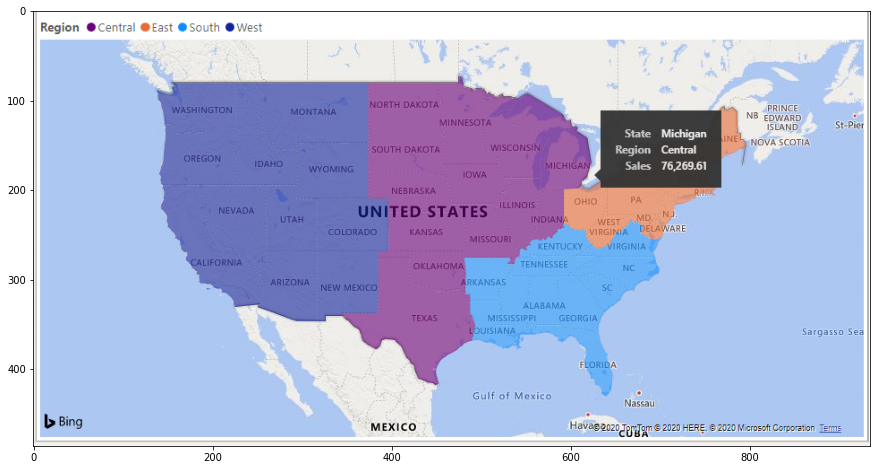

In [8]:
img = image.imread(r'Screenshot (122).png')
fig = plt.figure(figsize=(15,10))
plt.imshow(img)

### From the above map we get a good idea of all the regions are divided. Now performing analysis on all the regions one by one.

## Regional Analysis:


In [9]:
sales = []
profit = []
regions = list(set(df['Region']))

for i in range(len(regions)):
    reg = df_1.get_group(regions[i])
    sal = sum(reg['Sales'])
    pro = sum(reg['Profit'])
    sales.append(sal)
    profit.append(pro)
    

## Visualizing the profits and sales for each region:

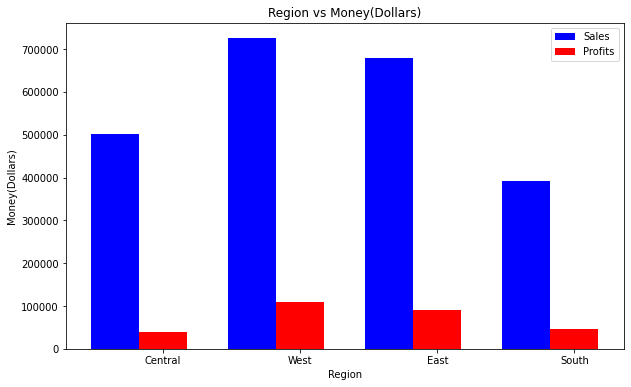

In [10]:
figure = plt.figure(figsize=(10,6))
index = np.arange(4)
bar_width = 0.35

col_1 = plt.bar(index, sales, bar_width, color='blue', label = 'Sales')
col_2 = plt.bar(index + bar_width, profit, bar_width, color = 'red', label = 'Profits')

plt.title('Region vs Money(Dollars)')
plt.xlabel('Region')
plt.ylabel('Money(Dollars)')
plt.xticks(index+bar_width, tuple(regions))
plt.legend()
plt.show()

**We can observe that the West region has the most Sales out of the 4 regions and the South has the least Sales, we also see that the West region is leading in profit and the central region is making the least profit.**

Now we will dive deeper into the regional analysis and start analyzing every region:

## Central Region Analysis:

In [11]:
df_5 = df.groupby(by=['Region', 'State'])

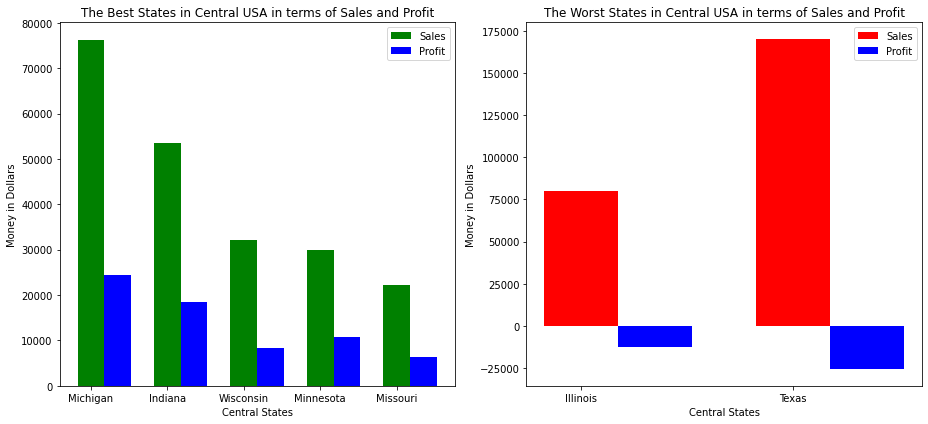

In [12]:
# Central
central_states = df_1.get_group('Central')
central_states = list(set(central_states['State']))
top_states = []
worst_state = []

for i in range(len(central_states)):
    rec = df_5.get_group(('Central', central_states[i]))
    sal = sum(rec['Sales'])
    pro = sum(rec['Profit'])
    if pro > 0:
        top_states.append([central_states[i], sal, pro])
    else:
        worst_state.append([central_states[i], sal, pro])
    
top_states = sorted(top_states, reverse = True, key=lambda x:x[1])

top_sales = [[i[0], i[1]] for i in top_states[:5]]

index = np.arange(5)
bar_width = 0.35

fig = plt.figure(figsize =(13,6))
plt.subplot(1,2,1)
plt.bar(index, [i[1] for i in top_sales], bar_width, color = 'green', label = 'Sales')
plt.bar(index + bar_width, [i[2] for i in top_states[:5]], bar_width, color = 'blue', label = "Profit")
plt.xticks(index, [i[0] for i in top_sales])
plt.xlabel('Central States')
plt.ylabel('Money in Dollars')
plt.title('The Best States in Central USA in terms of Sales and Profit')
plt.legend()
#plt.show()

index = np.arange(len(worst_state))
plt.subplot(1,2,2)
plt.bar(index, [i[1] for i in worst_state], bar_width, color = 'red', label = 'Sales')
plt.bar(index + bar_width, [i[2] for i in worst_state[:5]], bar_width, color = 'blue', label = "Profit")
plt.xticks(index, [i[0] for i in worst_state])
plt.xlabel('Central States')
plt.ylabel('Money in Dollars')
plt.title('The Worst States in Central USA in terms of Sales and Profit')
plt.legend()
plt.tight_layout()
plt.show()

**Graph 1: Best States in Central USA in terms of Sales and Profit:**

We can observe that out of all the sates in Central Region Michigan is the Best performimg state followed by other states like Indiana, Wisconsis, Minnesota and Missouri.

**Graph 2: Worst States in Central USA in terms of the Sales and Profit:**

It is clearly seen that Illinois  and Texas are the worst performing states and they are running in loss.

## West Region Analysis:

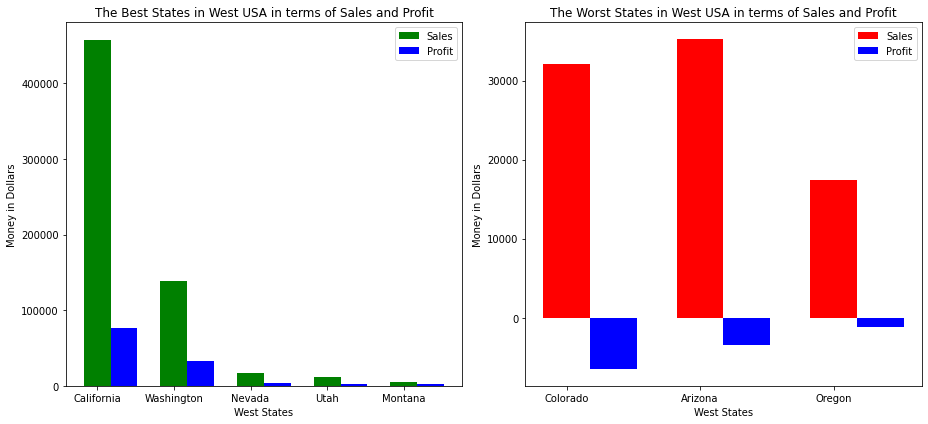

In [13]:
# West
west_states = df_1.get_group('West')
west_states = list(set(west_states['State']))
top_states = []
worst_state = []

for i in range(len(west_states)):
    rec = df_5.get_group(('West', west_states[i]))
    sal = sum(rec['Sales'])
    pro = sum(rec['Profit'])
    if pro > 0:
        top_states.append([west_states[i], sal, pro])
    else:
        worst_state.append([west_states[i], sal, pro])
    
top_states = sorted(top_states, reverse = True, key=lambda x:x[1])

top_sales = [[i[0], i[1]] for i in top_states[:5]]

index = np.arange(5)
bar_width = 0.35

fig = plt.figure(figsize =(13,6))
plt.subplot(1,2,1)
plt.bar(index, [i[1] for i in top_sales], bar_width, color = 'green', label = 'Sales')
plt.bar(index + bar_width, [i[2] for i in top_states[:5]], bar_width, color = 'blue', label = "Profit")
plt.xticks(index, [i[0] for i in top_sales])
plt.xlabel('West States')
plt.ylabel('Money in Dollars')
plt.title('The Best States in West USA in terms of Sales and Profit')
plt.legend()
#plt.show()

index = np.arange(len(worst_state))
plt.subplot(1,2,2)
plt.bar(index, [i[1] for i in worst_state], bar_width, color = 'red', label = 'Sales')
plt.bar(index + bar_width, [i[2] for i in worst_state], bar_width, color = 'blue', label = "Profit")
plt.xticks(index, [i[0] for i in worst_state])
plt.xlabel('West States')
plt.ylabel('Money in Dollars')
plt.title('The Worst States in West USA in terms of Sales and Profit')
plt.legend()
plt.tight_layout()
plt.show()

**Graph 1: Best States in West USA in terms of Sales and Profit:**

We can observe that out of all the sates in West Region California is the Best performimg state followed by other states like Washington, Nevada, Utah and Montana.

**Graph 2: Worst States in West USA in terms of the Sales and Profit:**

It is clearly seen that Colorado, Oregon and Arizona are the worst performing states and they are running in loss.

## East Region Analysis:

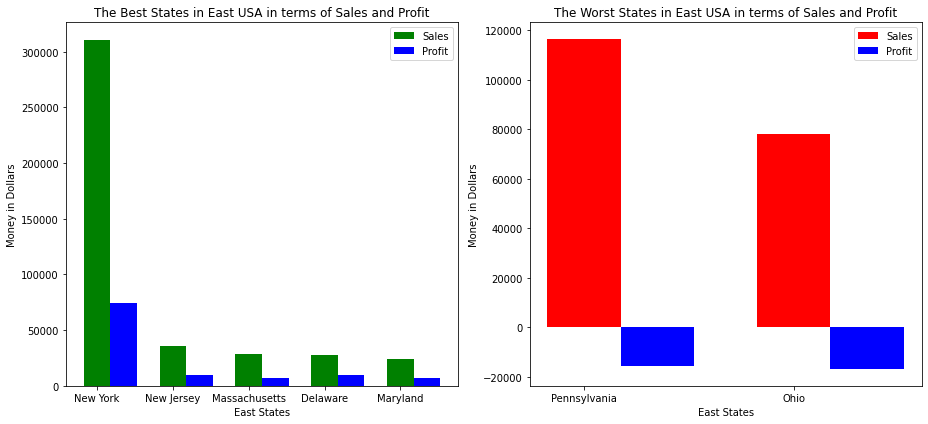

In [14]:
# East
central_states = df_1.get_group('East')
central_states = list(set(central_states['State']))
top_states = []
worst_state = []

for i in range(len(central_states)):
    rec = df_5.get_group(('East', central_states[i]))
    sal = sum(rec['Sales'])
    pro = sum(rec['Profit'])
    if pro > 0:
        top_states.append([central_states[i], sal, pro])
    else:
        worst_state.append([central_states[i], sal, pro])
    
top_states = sorted(top_states, reverse = True, key=lambda x:x[1])

top_sales = [[i[0], i[1]] for i in top_states[:5]]

index = np.arange(5)
bar_width = 0.35

fig = plt.figure(figsize =(13,6))
plt.subplot(1,2,1)
plt.bar(index, [i[1] for i in top_sales], bar_width, color = 'green', label = 'Sales')
plt.bar(index + bar_width, [i[2] for i in top_states[:5]], bar_width, color = 'blue', label = "Profit")
plt.xticks(index, [i[0] for i in top_sales])
plt.xlabel('East States')
plt.ylabel('Money in Dollars')
plt.title('The Best States in East USA in terms of Sales and Profit')
plt.legend()
#plt.show()

index = np.arange(len(worst_state))
plt.subplot(1,2,2)
plt.bar(index, [i[1] for i in worst_state], bar_width, color = 'red', label = 'Sales')
plt.bar(index + bar_width, [i[2] for i in worst_state], bar_width, color = 'blue', label = "Profit")
plt.xticks(index, [i[0] for i in worst_state])
plt.xlabel('East States')
plt.ylabel('Money in Dollars')
plt.title('The Worst States in East USA in terms of Sales and Profit')
plt.legend()
plt.tight_layout()
plt.show()

**Graph 1: Best States in East USA in terms of Sales and Profit:**

We can observe that out of all the sates in East Region New York is the Best performimg state followed by other states like New Jersey, Massachusetts, Delaware and Maryland.

**Graph 2: Worst States in East USA in terms of the Sales and Profit:**

It is clearly seen that Ohio and Pennsylvania are the worst performing states and they are running in loss.

## South Region Analysis:

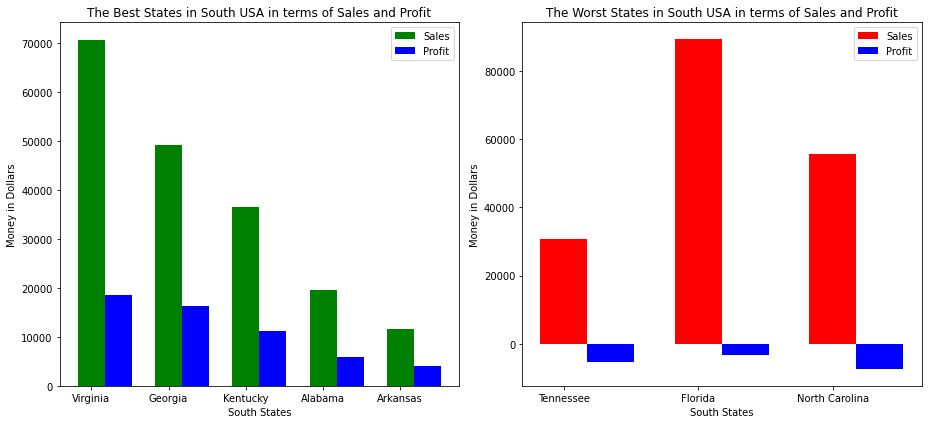

In [15]:
# South
central_states = df_1.get_group('South')
central_states = list(set(central_states['State']))
top_states = []
worst_state = []

for i in range(len(central_states)):
    rec = df_5.get_group(('South', central_states[i]))
    sal = sum(rec['Sales'])
    pro = sum(rec['Profit'])
    if pro > 0:
        top_states.append([central_states[i], sal, pro])
    else:
        worst_state.append([central_states[i], sal, pro])
    
top_states = sorted(top_states, reverse = True, key=lambda x:x[1])

top_sales = [[i[0], i[1]] for i in top_states[:5]]

index = np.arange(5)
bar_width = 0.35

fig = plt.figure(figsize =(13,6))
plt.subplot(1,2,1)
plt.bar(index, [i[1] for i in top_sales], bar_width, color = 'green', label = 'Sales')
plt.bar(index + bar_width, [i[2] for i in top_states[:5]], bar_width, color = 'blue', label = "Profit")
plt.xticks(index, [i[0] for i in top_sales])
plt.xlabel('South States')
plt.ylabel('Money in Dollars')
plt.title('The Best States in South USA in terms of Sales and Profit')
plt.legend()
#plt.show()

index = np.arange(len(worst_state))
plt.subplot(1,2,2)
plt.bar(index, [i[1] for i in worst_state], bar_width, color = 'red', label = 'Sales')
plt.bar(index + bar_width, [i[2] for i in worst_state], bar_width, color = 'blue', label = "Profit")
plt.xticks(index, [i[0] for i in worst_state])
plt.xlabel('South States')
plt.ylabel('Money in Dollars')
plt.title('The Worst States in South USA in terms of Sales and Profit')
plt.legend()
plt.tight_layout()
plt.show()

**Graph 1: Best States in South USA in terms of Sales and Profit:**

We can observe that out of all the sates in East Region Virginia is the Best performimg state followed by other states like Georgia, Kentucky, Alabama and Arkansas.

**Graph 2: Worst States in South USA in terms of the Sales and Profit:**

It is clearly seen that North Carolina, Tennessee and Florida are the worst performing states and they are running in loss.

## Overall Region Analysis:

In [16]:
states = list(set(df['State']))
df_4 = df.groupby('State')
df_4.first()
len(states)

49

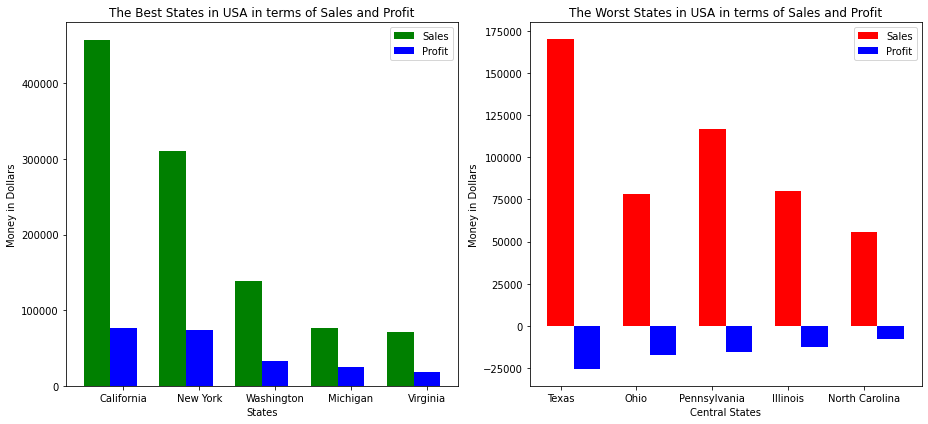

In [17]:
state_sales = []
worst_state = []

for i in range(len(states)):
    state = df_4.get_group(states[i])
    sal = sum(state['Sales'])
    pro = sum(state['Profit'])
    if pro > 0:
        state_sales.append([states[i], sal, pro])
    else:
        worst_state.append([states[i], sal, pro])
    
top_states = sorted(state_sales, reverse = True, key=lambda x:x[1])
worst_state = sorted(worst_state, key=lambda x:x[2])
worst_state = worst_state[:5]

top_sales = [[i[0], i[1]] for i in top_states[:5]]

index = np.arange(5)
bar_width = 0.35

fig = plt.figure(figsize =(13,6))
plt.subplot(1,2,1)
plt.bar(index, [i[1] for i in top_sales], bar_width, color = 'green', label = 'Sales')
plt.bar(index + bar_width, [i[2] for i in top_states[:5]], bar_width, color = 'blue', label = "Profit")
plt.xticks(index + bar_width, [i[0] for i in top_sales])
plt.xlabel('States')
plt.ylabel('Money in Dollars')
plt.title('The Best States in USA in terms of Sales and Profit')
plt.legend()
#plt.show()

plt.subplot(1,2,2)
plt.bar(index, [i[1] for i in worst_state], bar_width, color = 'red', label = 'Sales')
plt.bar(index + bar_width, [i[2] for i in worst_state], bar_width, color = 'blue', label = "Profit")
plt.xticks(index, [i[0] for i in worst_state])
plt.xlabel('Central States')
plt.ylabel('Money in Dollars')
plt.title('The Worst States in USA in terms of Sales and Profit')
plt.legend()
plt.tight_layout()
plt.show()

**Graph 1: Best States in USA in terms of Sales and Profit:**

We can observe that out of all the sates in USA California is the Best performimg state followed by other states like New York, Washington, Michigan and Virginia.

**Graph 2: Worst States in USA in terms of the Sales and Profit:**

It is clearly seen that Texas, Ohio and Pennslyvania, Illinois and  North Carolina are the worst performing states and they are running in loss.

## Category Analysis:

In [18]:
df_2 = df.groupby(by = ['Category'])
df_2.first()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Sub-Category,Sales,Quantity,Discount,Profit
Category,,,,,,,,,,,,
Furniture,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Bookcases,261.960,2,0.0,41.9136
Office Supplies,Second Class,Corporate,United States,Los Angeles,California,90036,West,Labels,14.620,2,0.0,6.8714
Technology,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Phones,907.152,6,0.2,90.7152


In [19]:
sales = []
profit = []
category = list(set(df['Category']))

for i in range(len(category)):
    cat = df_2.get_group(category[i])
    sal = sum(cat['Sales'])
    pro = sum(cat['Profit'])
    sales.append(sal)
    profit.append(pro)


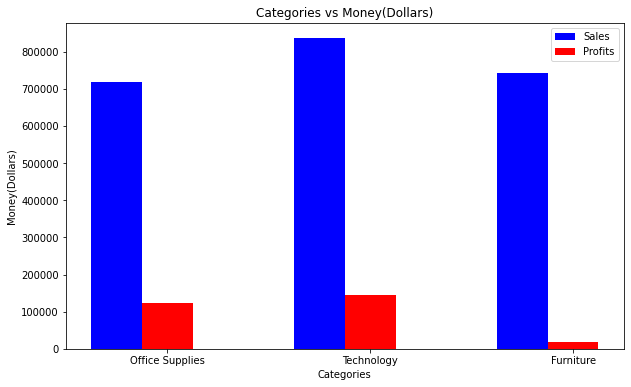

In [20]:
figure = plt.figure(figsize=(10,6))
index = np.arange(3)
bar_width = 0.25

col_1 = plt.bar(index, sales, bar_width, color='blue', label = 'Sales')
col_2 = plt.bar(index + bar_width, profit, bar_width, color = 'red', label = 'Profits')

plt.title('Categories vs Money(Dollars)')
plt.xlabel('Categories')
plt.ylabel('Money(Dollars)')
plt.xticks(index+bar_width, tuple(category))
plt.legend()
plt.show()

**From the above graph we can observe that Technology has the most Sales and Profit in the SuperStores accross America and Furniture has the good sales but the profit margin is very low whereas Office supplies are average sellers and a good profit is made from Office Supplies**

## Furniture Analysis:

In [21]:
df_3 = df.groupby(by = ['Category', "Sub-Category"])
#df_3.first()

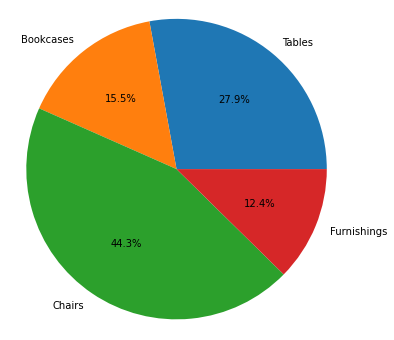

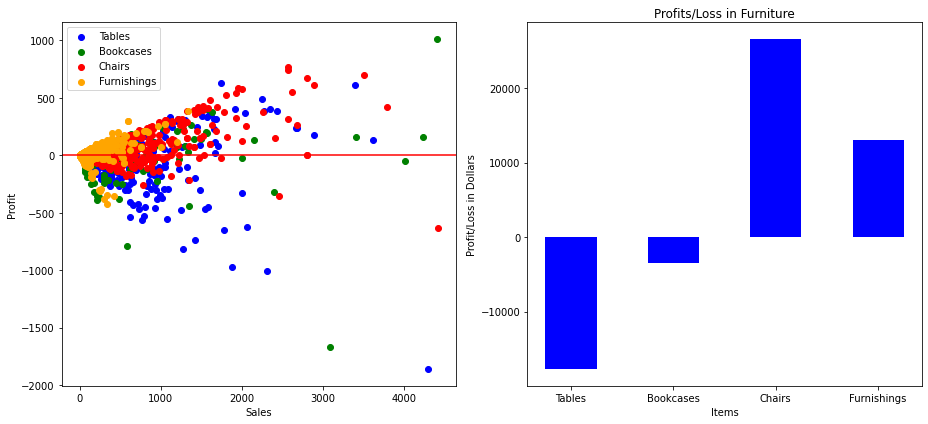

In [22]:
furniture = df_2.get_group('Furniture')
diff_fur = list(set(furniture['Sub-Category']))
# diff_fur
sales = []
profits = []

S = []
P = []

for i in range(len(diff_fur)):
    fur_type = df_3.get_group(('Furniture', diff_fur[i]))
    sal = sum(fur_type['Sales'])
    sales.append(sal)
    pro = sum(fur_type['Profit'])
    profits.append(pro)
    x = list(fur_type['Sales'])
    y = list(fur_type['Profit'])
    S.append(x)
    P.append(y)

figure = plt.figure(figsize = [6,6])
plt.pie(sales, labels = diff_fur, autopct = '%1.1f%%')
plt.axis("equal")
plt.show()


index = np.arange(len(diff_fur))
bar_width = 0.5

figure = plt.figure(figsize = [13,6])
plt.subplot(1,2,1)
for i in range(len(S)):
    colors = ['blue', 'green', 'red', 'orange', 'yellow', 'black', 'violet', 'pink']
    plt.scatter(x = S[i], y = P[i], color = colors[i], label = diff_fur[i])
plt.axhline(y=0, color = 'red')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
#plt.show()

plt.subplot(1,2,2)
plt.bar(index, profits, bar_width, color = 'blue')
plt.xticks(index, tuple(diff_fur))
plt.title('Profits/Loss in Furniture')
plt.xlabel('Items')
plt.ylabel('Profit/Loss in Dollars')
plt.tight_layout()
plt.show()

**Graph 1: Pie chart (Sales % of Sub-Categories of Furniture)**

It is seen that Chairs is the most sold Item in the Furniture Category. Tabels also make decent sales.

**Graph 2: Scatter Plot (Sales vs Profit of Sub-Categories of Furniture)**

We can observe that all the furniture products are contributing to losses among which Tabels and Bookcases are showing heavy damage.

**Graph 3: Bar Chart(Items vs Profit)**

We can observe that Tabels are giving huge loss in the furniture category followed by Bookcases.

## Office Supplies Analysis:

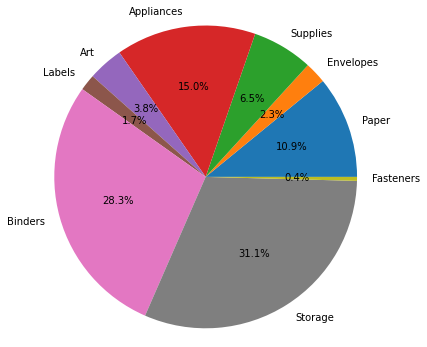

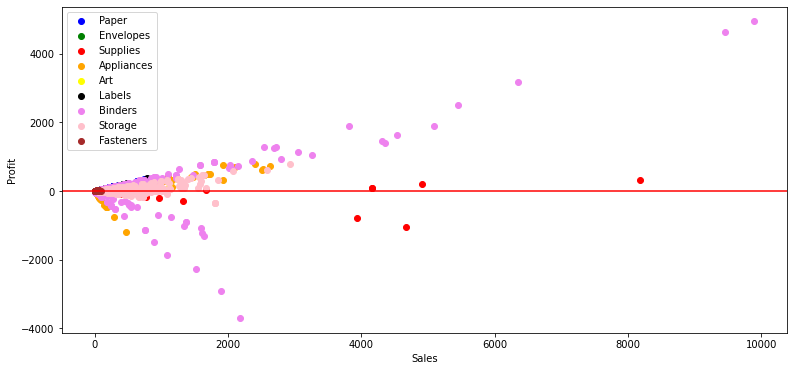

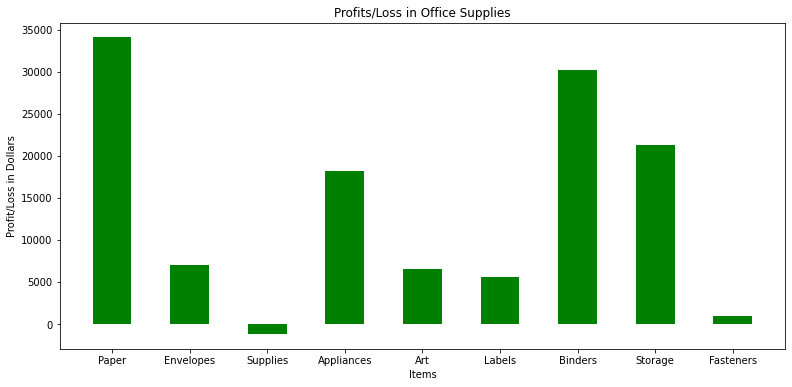

In [23]:
office_supplies = df_2.get_group('Office Supplies')
diff_sup = list(set(office_supplies['Sub-Category']))
# diff_sup

sales = []
profits = []

S = []
P = []

for i in range(len(diff_sup)):
    sup_type = df_3.get_group(('Office Supplies', diff_sup[i]))
    sal = sum(sup_type['Sales'])
    sales.append(sal)
    pro = sum(sup_type['Profit'])
    profits.append(pro)
    x = list(sup_type['Sales'])
    y = list(sup_type['Profit'])
    S.append(x)
    P.append(y)

figure = plt.figure(figsize = [6,6])
plt.pie(sales, labels = diff_sup, autopct = '%1.1f%%')
plt.axis("equal")
plt.show()


index = np.arange(len(diff_sup))
bar_width = 0.5


figure = plt.figure(figsize = [13,6])
for i in range(len(S)):
    colors = ['blue', 'green', 'red', 'orange', 'yellow', 'black', 'violet', 'pink', 'brown']
    plt.scatter(x = S[i], y = P[i], color = colors[i], label = diff_sup[i])
plt.axhline(y=0, color = 'red')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.show()

figure = plt.figure(figsize = [13,6])
plt.bar(index, profits, bar_width, color = 'green')
plt.xticks(index, tuple(diff_sup))
plt.title('Profits/Loss in Office Supplies')
plt.xlabel('Items')
plt.ylabel('Profit/Loss in Dollars')
plt.show()

**Graph 1: Pie chart (Sales % of Sub-Categories of Office Supplies)**

It is seen that Storage is the most sold Item in the Furniture Category. Binders and Appliances also make decent sales. But we can see that Fasteners and Labels are making poor sales.

**Graph 2: Scatter Plot (Sales vs Profit of Sub-Categories of Office Supplies)**

We can observe that most of the Office Supplies are contributing to losses among which Binders and Supplies are showing heavy damage.

**Graph 3: Bar Chart(Items vs Profit)**

We can observe that Supplies are contributing to some loss in the Office Supplies category.

## Technology Products Analysis:

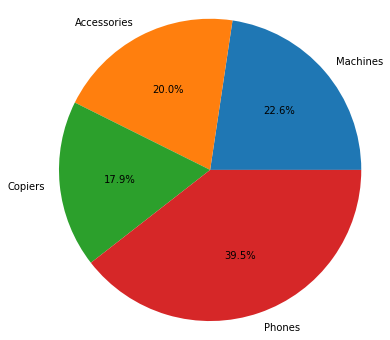

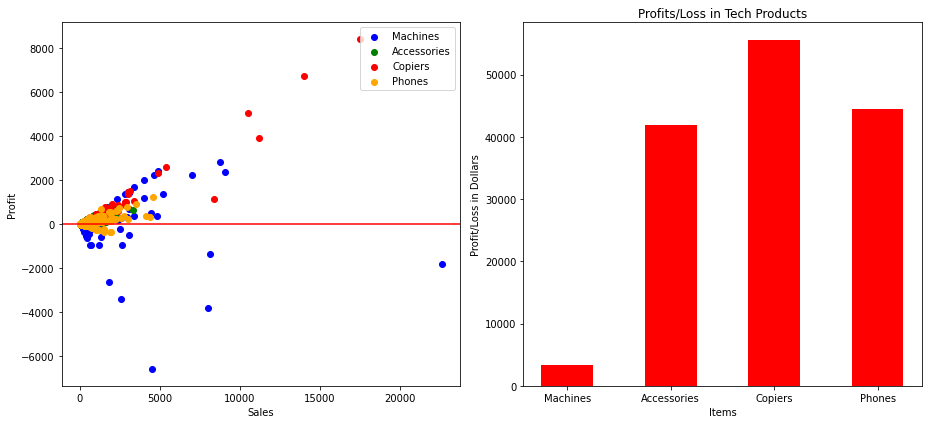

In [24]:
tech = df_2.get_group('Technology')
diff_tech = list(set(tech['Sub-Category']))
# diff_tech

sales = []
profits = []

S = []
P = []

for i in range(len(diff_tech)):
    tech_type = df_3.get_group(('Technology', diff_tech[i]))
    sal = sum(tech_type['Sales'])
    sales.append(sal)
    pro = sum(tech_type['Profit'])
    profits.append(pro)
    x = list(tech_type['Sales'])
    y = list(tech_type['Profit'])
    S.append(x)
    P.append(y)


figure = plt.figure(1, figsize = [6,6])
plt.pie(sales, labels = diff_tech, autopct = '%1.1f%%')
plt.axis("equal")
#plt.show()


index = np.arange(len(diff_tech))
bar_width = 0.5

figure = plt.figure(figsize = [13,6])
plt.subplot(1,2,1)
for i in range(len(S)):
    colors = ['blue', 'green', 'red', 'orange', 'yellow', 'black', 'violet', 'pink']
    plt.scatter(x = S[i], y = P[i], color = colors[i], label = diff_tech[i])
plt.axhline(y=0, color = 'red')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
#plt.show()

plt.subplot(1,2,2)
plt.bar(index, profits, bar_width, color = 'red')
plt.xticks(index, tuple(diff_tech))
plt.title('Profits/Loss in Tech Products')
plt.xlabel('Items')
plt.ylabel('Profit/Loss in Dollars')
plt.tight_layout()
plt.show()

**Graph 1: Pie chart (Sales % of Sub-Categories of Tech Products)**
    
It is seen that Phones are the most sold Item in the Furniture Category. All the other products like machines, copiers and accessories make good sales.

**Graph 2: Scatter Plot (Sales vs Profit of Sub-Categories of Tech Products)**
    
We can observe that most of the Tech products are contributing to losses among which Machines are showing heavy damage.

**Graph 3: Bar Chart(Items vs Profit)**
    
We can observe that none of the Tech products in the Technology category are running in losses but the profit margin of the Machines is very less compared to others.

## Conclusion:

### Regional Analysis:

1. In the Central region the SuperStore should look into the stores in **Illinois** and **Texas** which are running in losses and find out the reason for their poor performance. The Central region out of all the regions has the least profit and so the organization should focus more in improving their services in this region.


2. In the West region the Super Store should look into the stores in **Colorado, Arizon, Aregon** which are running in loss and focus on improving in these states. Overall the West region has the best sales and most profit and thus they should take some insights from the stores in the west to improve conditions in other regions.


3. In the East region the Super Store should look into the stores in **Ohio** and **Pennsylvania** which are running in loss and focus on improving in these states. Overall the sales and profit in this region is average and has scope to improve.


4. In the South region the Super Store should look into the stores in **North Carolina, Tennessee and Florida** and focus on improving in these states. Overall the sales and profit in this region is average and has scope to improve.

### Product Analysis:

1. In the Furniture category we can see many losses especially in **Tabels and Bookcases** the Super Store should reconsider selling Tabels or should find out the reason for the heavy loss and rectify the errors as Tabels are one of the most selling items.


2. In the Office Supplies category we can see that **Fasteners and Supplies** have poor sales and are not profitable so they should consider dropping these items and focus more on the items like paper and storage which are doing weel and getting them profit. Currently labels are showing poor sales but the profit that is average so the Super Store can also focus on more sales of labels.


3. In the Technology category **Machines** make up for a large % of the total sales but there are some issues with the machines due to which heavy losses can be observed, if these losses are minimized **Machines** could prove to be a very profitable product. All the other products are doing well especially **Copiers** which make up about **18%** of the total sales the store can try and market copiers a bit more so that the sales improve and so does the profit.
